## **Import some libraries**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('Training.csv')


In [ ]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## **data wrangling**

In [ ]:
train.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [ ]:
#List of the symptoms.
symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
       'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'movement_stiffness', 'spinning_movements',
       'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side',
       'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze']

In [ ]:
disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
' Migraine','Cervical spondylosis',
'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
'Impetigo']

In [ ]:
train.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

In [ ]:
X_train= train[symptoms]

y_train = train[["prognosis"]]
#change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
np.ravel(y_train)

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
input_data = pd.read_csv('Training.csv')
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
#They are 4920 rows, 133 columns
input_data.shape

(4920, 133)

## **See the Target Variable Distribution**

In [ ]:
#looking how much percent each diseases having
input_data['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

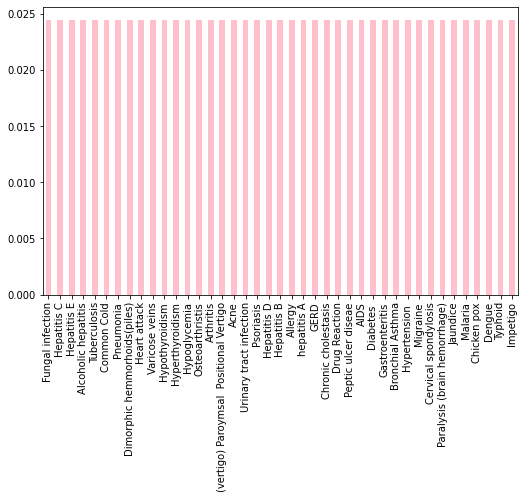

In [ ]:
#as we can see each no. diseases having the same percentage through bar chart
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='pink')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

Check the relationship between the variables by applying the correlation

In [ ]:
#checking the relationship between the variables by applying the correlation 
corr = input_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

DECISION TREE!!!!

In [ ]:
# decision treee:::::

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:


#read and print dataset
df=pd.read_csv("Training.csv")
value=['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
       'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'movement_stiffness', 'spinning_movements',
       'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side',
       'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze']
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                
df=df.apply(string_to_int.fit_transform) 
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,35,0


In [ ]:
feature_cols = ['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs',
       'fast_heart_rate', 'pain_during_bowel_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity',
       'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
       'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain',
       'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
       'swelling_joints', 'movement_stiffness', 'spinning_movements',
       'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side',
       'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze']
X = df[feature_cols]                        
y = df.prognosis  

In [ ]:

#The train_test_split function of the sklearn. model_selection package in Python splits arrays or matrices into random subsets for train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [ ]:
#DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. 
#The 'fit' method trains the algorithm on the training data, after the model is initialized.

from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)   
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:

#predict() function enables us to predict the labels of the data values on the basis of the trained model. 

y_pred= classifier.predict(X_test)

In [ ]:


X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred

In [ ]:
#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

In [ ]:

#Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

In [ ]:
import graphviz

In [ ]:
#This function generates a GraphViz representation of the decision tree, 
from sklearn.tree import export_graphviz

In [ ]:
#Six is a Python 2 and 3 compatibility library
#The sys module provides information about constants, functions and methods of the Python interpreter
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [ ]:

# improved version of the old pydot project that provides a Python Interface to Graphviz's Dot language.
import pydotplus

In [ ]:
from IPython.display import Image

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=value,class_names=['Fungal infection' ,
'Hepatitis C ',                               
'Hepatitis E ',                              
'Alcoholic hepatitis '                       ,
'Tuberculosis  '                             ,
'Common Cold     '                           ,
'Pneumonia '                                 ,
'Dimorphic hemmorhoids(piles)'               ,
'Heart attack'                               ,
'Varicose veins'                             ,
'Hypothyroidism'                             ,
'Hyperthyroidism'                            ,
'Hypoglycemia '                              ,
'Osteoarthristis'                            ,
'Arthritis  '                                ,
'(vertigo) Paroymsal  Positional Vertigo '   ,
'Acne ',
'Urinary tract infection '                   ,
'Psoriasis  '                                ,
'Hepatitis D   '                             ,
'Hepatitis B   '                             ,
'Allergy'                                    ,
'hepatitis A '                               ,
'GERD '                                      ,
'Chronic cholestasis'                        ,
'Drug Reaction '                             ,
'Peptic ulcer diseae '                       ,
'AIDS  '                                     ,
'Diabetes  '                                 ,
'Gastroenteritis  '                          ,
'Bronchial Asthma '                          ,
'Hypertension  '                             ,
'Migraine '                                  ,
'Cervical spondylosis '                      ,
'Paralysis (brain hemorrhage) '              ,
'Jaundice'                                  , 
'Malaria '                                   ,
'Chicken pox '                           ,
'Dengue'                                   ,
'Typhoid' ,
'Impetigo'])

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph.create_png())

In [ ]:
#GINI INDEX
from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="gini", random_state=100)   
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=100)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## **Using Random Forest:**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

## **Importing Dataset**

In [ ]:
dataset = pd.read_csv('/content/Training.csv')

In [ ]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## **Preparing Data For Training**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Feature Scaling**

In [ ]:
# Feature Scaling
#it would be beneficial to scale our data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Training the Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## **Evaluating the Algorithm**

In [ ]:
# MAE: Its an evaluation metrics
# MSE: Its an average squared deviation between the y-pred and y-test
# RMSE: Its used for evaluating the quality of predicitons.
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.027286585365853648
Mean Squared Error: 0.030978150406504017
Root Mean Squared Error: 0.17600610900336391


In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

## **Perform Prediction**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


## **NaiveBayes**

In [ ]:
#NaiveBayes

# **GaussianNB**

In [ ]:

#GaussianNB

import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df=pd.read_csv("Training.csv", index_col=0)

In [ ]:
df

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
itching,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN


In [ ]:
df_c=df.astype('category')
df_c["prognosis"]=df_c["prognosis"].cat.codes
df_c.head

<bound method NDFrame.head of         skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
itching                                                                       
1               1                    1                   0         0      0   
0               1                    1                   0         0      0   
1               0                    1                   0         0      0   
1               1                    0                   0         0      0   
1               1                    1                   0         0      0   
...           ...                  ...                 ...       ...    ...   
0               0                    0                   0         0      0   
0               1                    0                   0         0      0   
0               0                    0                   0         0      0   
0               1                    0                   0         0      0   
0               1     

In [ ]:
#iloc integer-location based indexing for selection by position.
X=df_c.iloc[:,:6].values
Y=df_c.iloc[:,6].values

In [ ]:
#random state that you provide is used as a seed to the random number generator. 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=15)
print(X_train.shape,y_train.shape)

(2460, 6) (2460,)


In [ ]:
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.3621951219512195


In [ ]:
#

# **CategoricalNB**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
#CategoricalNB suitable for classification with discrete features that are categorically distributed. 

In [ ]:
cnb = CategoricalNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_test.shape)

(3936, 6)
(984,)


In [ ]:
cnb.fit(X_train, y_train)
y_predict = cnb.predict(X_test)
print(y_predict)

[27 27  9  9  9  9  9  9  9  9  9  9 31 35  9  9  9 31  9  9  9 31  9  9
  4  9 37  9  9  9  9  9  9 31  9  9  9 27 37  9  9  9  9  9  9  9  9  9
 35 35  9 37  9  4  9  9 37 10  9  9  9  9 37  9  9  9  9  9  9  9 15  9
 27 31  9  9 27 27 10  9  9 27  9 27  9  9  9  9  9 11  9 37 31  9 37  9
 37  9 37 11  9  9  9  4  9  9  9  9 31  9 31  9  9  9  9 27  9  9  9  9
  9 35  9 27  9 37  9  9 27 31 11  9  9  9  9 27  9 37  9 37  9  9 35  9
 31 31 27  9 37  9  9 31  9 37  9 37  9 31  9 10  9  9  9  9 31 37 37  9
 27  9 31 31 31  9 37 27  9 31 10 27 37  9 10 31  9 37  9  9 35  9 37  9
  9 37 31 27 15  9  9 31  9 31  9 11 15  9  9  4  9 27  9 31  9  9  9  9
 37  9  9 31 11  9  9  9  9 31 27  9  9 35  9  9 37 37 35 27 31  9  9  9
 10  9  4  9  9 37 37  9  9  9  9 31  9 11 27 37  9 10 10  9  9 10 10 27
  9  9 10 27  9  9  9  9 37 37  9  9  9 27 37  9 37  9  9 35  9  9  9  9
  9  9  9 11 31 31 15 11  9 27  9 15 37  9 27 31 35  9  9  9  9  9  9 27
  9  9  9  9  9  9  9 15 31 31  9  9  9  9  9  9  9

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_predict).sum()))

Number of mislabeled points out of a total 984 points : 809


In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test, y_predict))
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_predict))


Accucary: 0.17784552845528456
Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **MultinomialNB**

In [ ]:
#MultinomialNB
#The multinomial Naive Bayes classifier is suitable for classification with discrete features 

In [ ]:
x = df.drop(['prognosis'],axis =1)
y = df['prognosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(X_train, y_train)

score = mnb.score(X_test, y_test)
print("Accuracy Score: ",score)


Accuracy Score:  0.18699186991869918


# **GradientBoostingClassifier**

In [ ]:
#GradientBoostingClassifier
#

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)
score = gbm_clf.score(X_train, y_train)
print(score)

0.21214430894308944


In [ ]:
score2 = gbm_clf.score(X_test, y_test)
print(score2)

0.18800813008130082


# **XGBClassifier**

In [ ]:
#XGBClassifier
#XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

In [ ]:
#XGBoost is used for supervised learning problems, where we use the training data (with multiple features) to predict a target variable

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
score = xgb_clf.score(X_train, y_train)
print(score)

1.0


In [ ]:
score1 = xgb_clf.score(X_test, y_test)
print(score1)

0.9959349593495935
